<a href="https://colab.research.google.com/github/SeptiLutfiana/PCVK_Ganjil_2023/blob/main/Week05_Septi_Lutfiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Kelompok 3 - TI 3H*
1. Mohammad Izamul Fikri Fahmi - 2141720171
2. Lukas Valentino - 2141720032
3. Septi Lutfiani - 2141720038

### Praktikum 5 Lanjutan Operasi Aritmatika dan Logika – Gamma Correction

1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


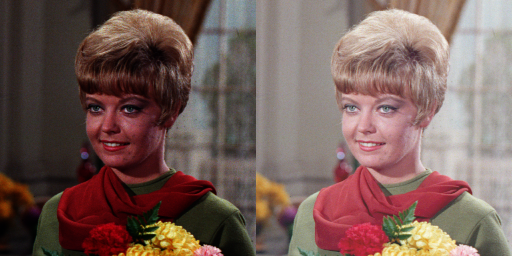

In [5]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt


print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_GANJIL_2023/content/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)
#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

### 2. Buat Simulasi Image Depth

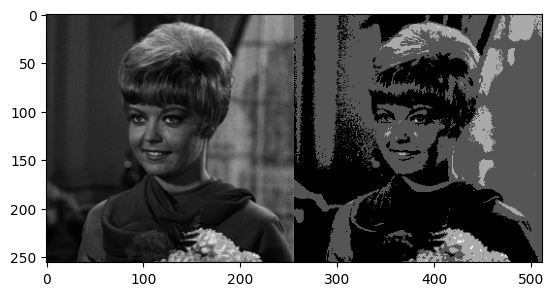

In [7]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK_GANJIL_2023/content/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

### 3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

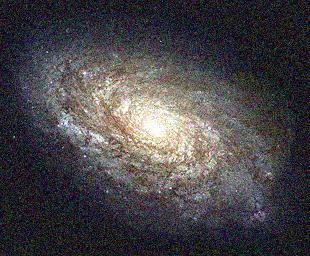

PSNR image 5 : 19.11917584225662 dB


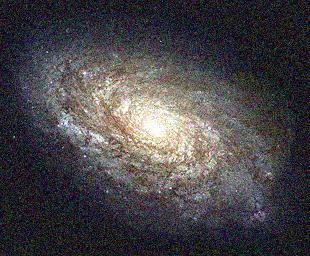

PSNR image 10 : 19.137978366527676 dB


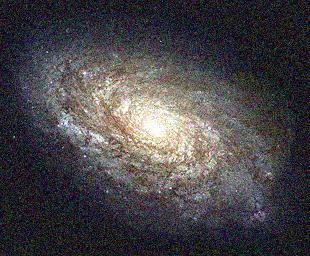

PSNR image 20 : 19.114760287386545 dB


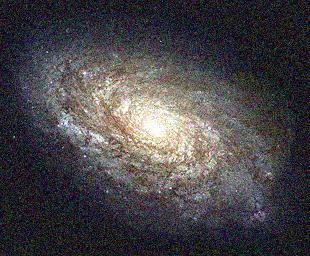

PSNR image 40 : 19.130985197446215 dB


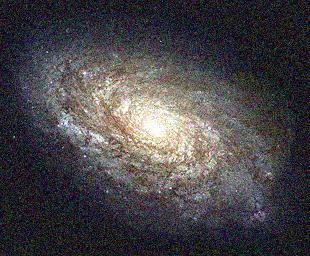

PSNR image 80 : 19.10761423068554 dB
Index 100 is out of range.
Average PSNR: 19.12210278486052 dB


In [68]:
import cv2
import numpy as np
import glob

def average_denoising(images):
    denoised_images = []
    for image in images:
        denoised_image = cv2.blur(image, (3, 3))  # Using averaging filter with a kernel size of 3x3
        denoised_images.append(denoised_image)
    return denoised_images

# Read the original image
img_asli = cv2.imread('/content/drive/MyDrive/PCVK_GANJIL_2023/content/galaxy.jpg')

# Read images with Gaussian Noise
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_GANJIL_2023/content/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

# Perform average denoising on the images
denoised_images = average_denoising(cv_img)

# Calculate and print PSNR for specific denoised images
indices = [5, 10, 20, 40, 80, 100]
psnr_values = []
for i in indices:
    if i >= len(denoised_images):
        print('Index', i, 'is out of range.')
        continue

    img_asli_float = img_asli.astype(np.float32)
    denoised_image_float = denoised_images[i].astype(np.float32)
    psnr = cv2.PSNR(img_asli_float, denoised_image_float)
    psnr_values.append(psnr)
    cv2_imshow(denoised_image)
    print('PSNR image', i, ':', psnr, 'dB')

# Print the conclusion
average_psnr = np.mean(psnr_values)
print('Average PSNR:', average_psnr, 'dB')

### Kesimpulannya
tingkat kualitas restorasi gambar pada indeks yang ditentukan berdasarkan nilai PSNR. Semakin tinggi nilai PSNR, semakin baik kualitas restorasi gambar tersebut.

### 4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya::

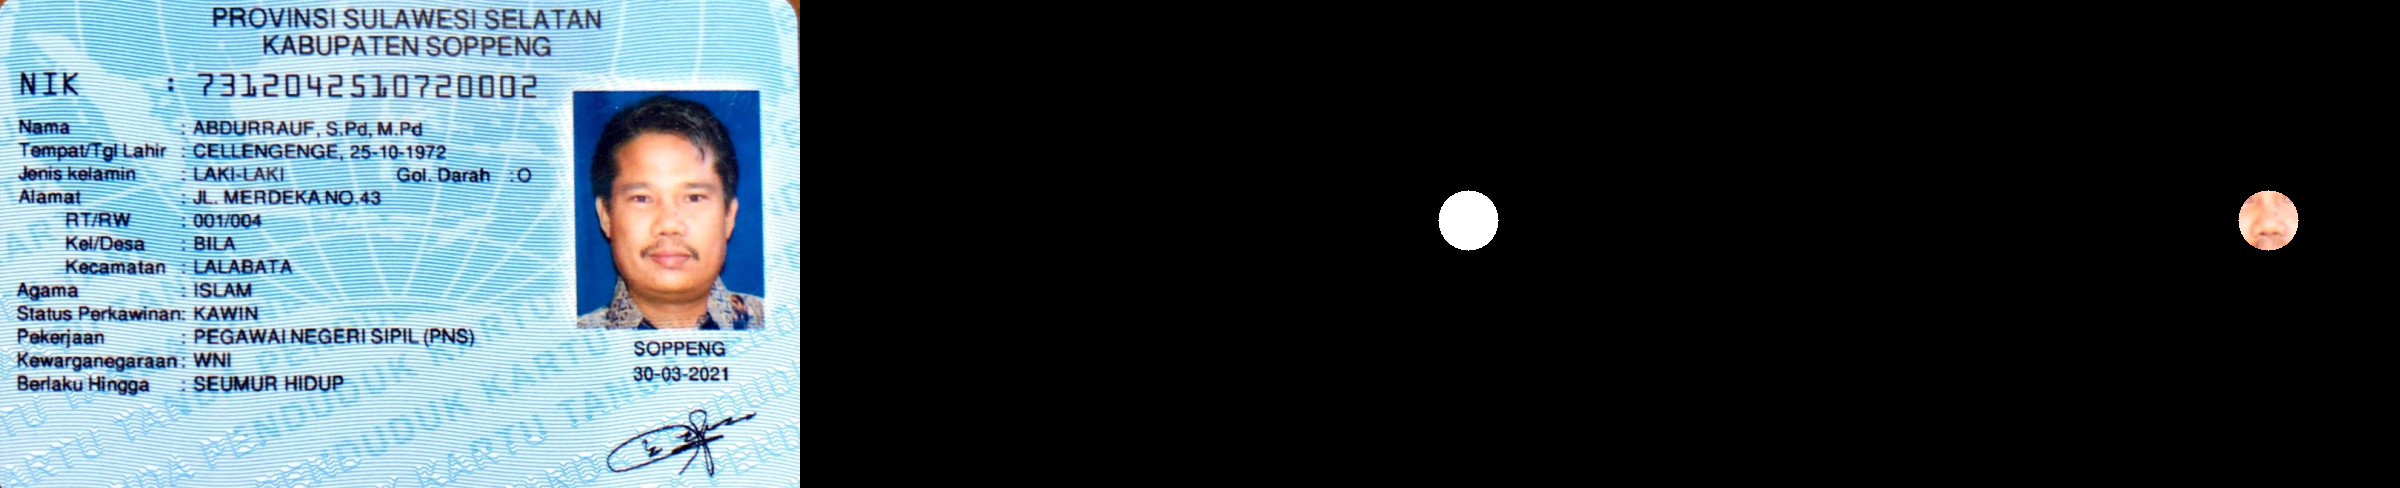

In [16]:
# Karena Kami Kelompok 3, jadi kita melakukan masking hidung
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # for image display
path='/content/drive/MyDrive/PCVK_GANJIL_2023/content/KTP.jpeg'
KTP=cv.imread(path)
mask = np.zeros_like(KTP)

center1 = (668, 220)
radius1 = 30

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_and(KTP, mask)

final_frame = cv.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

### 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

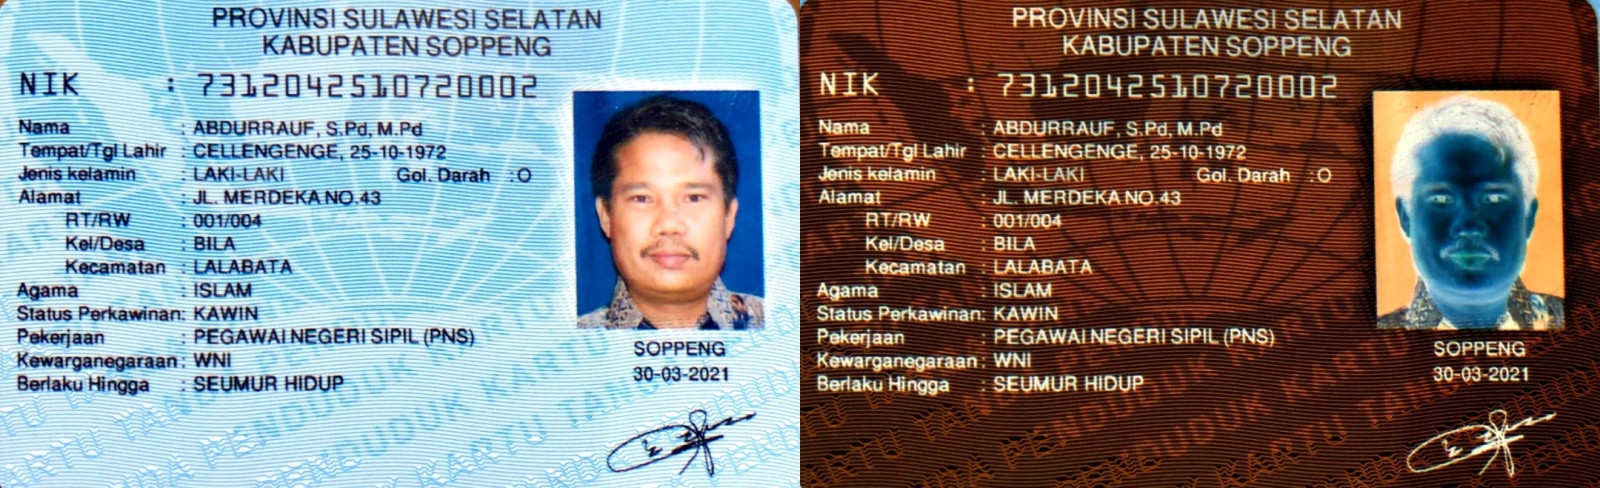

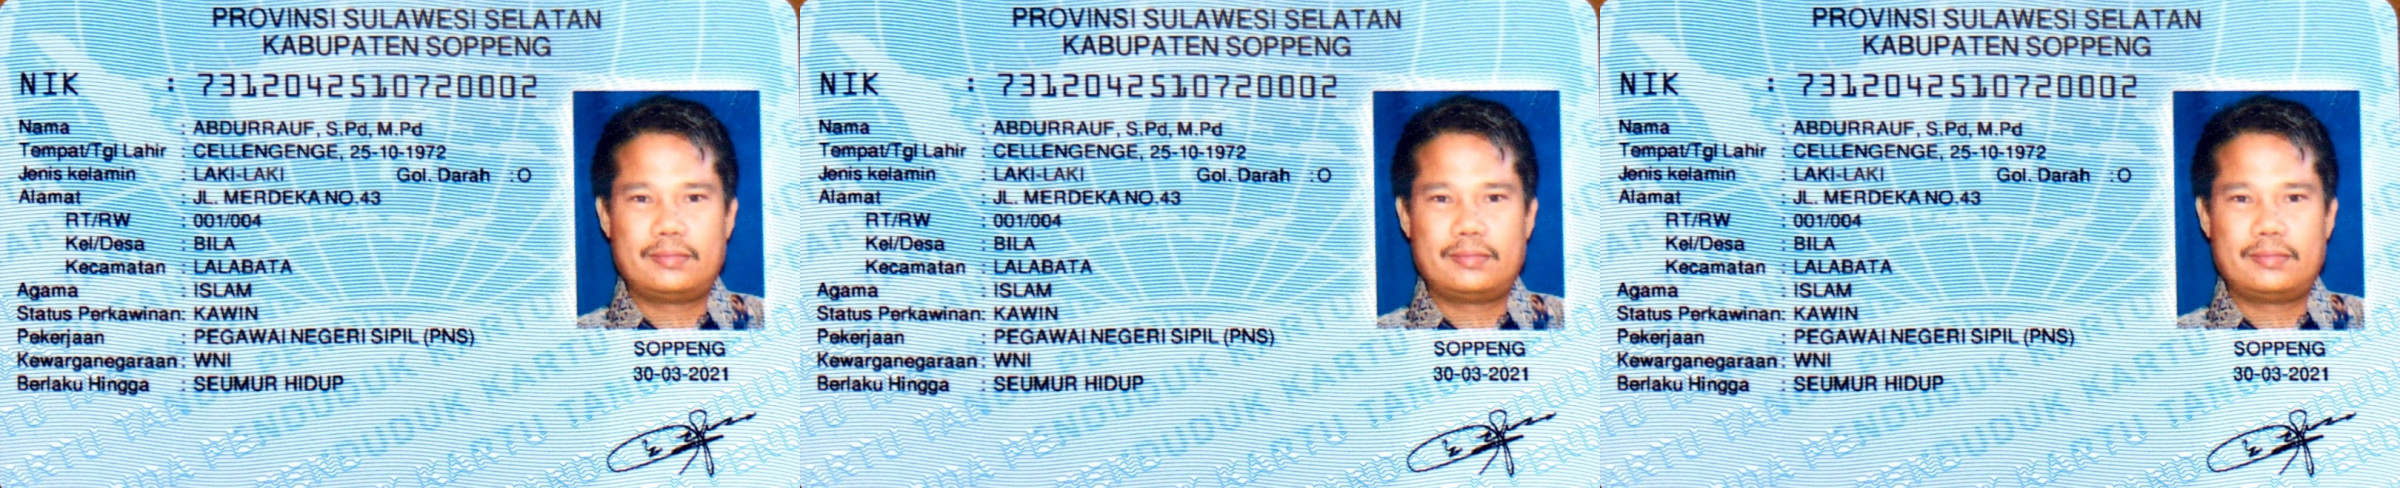

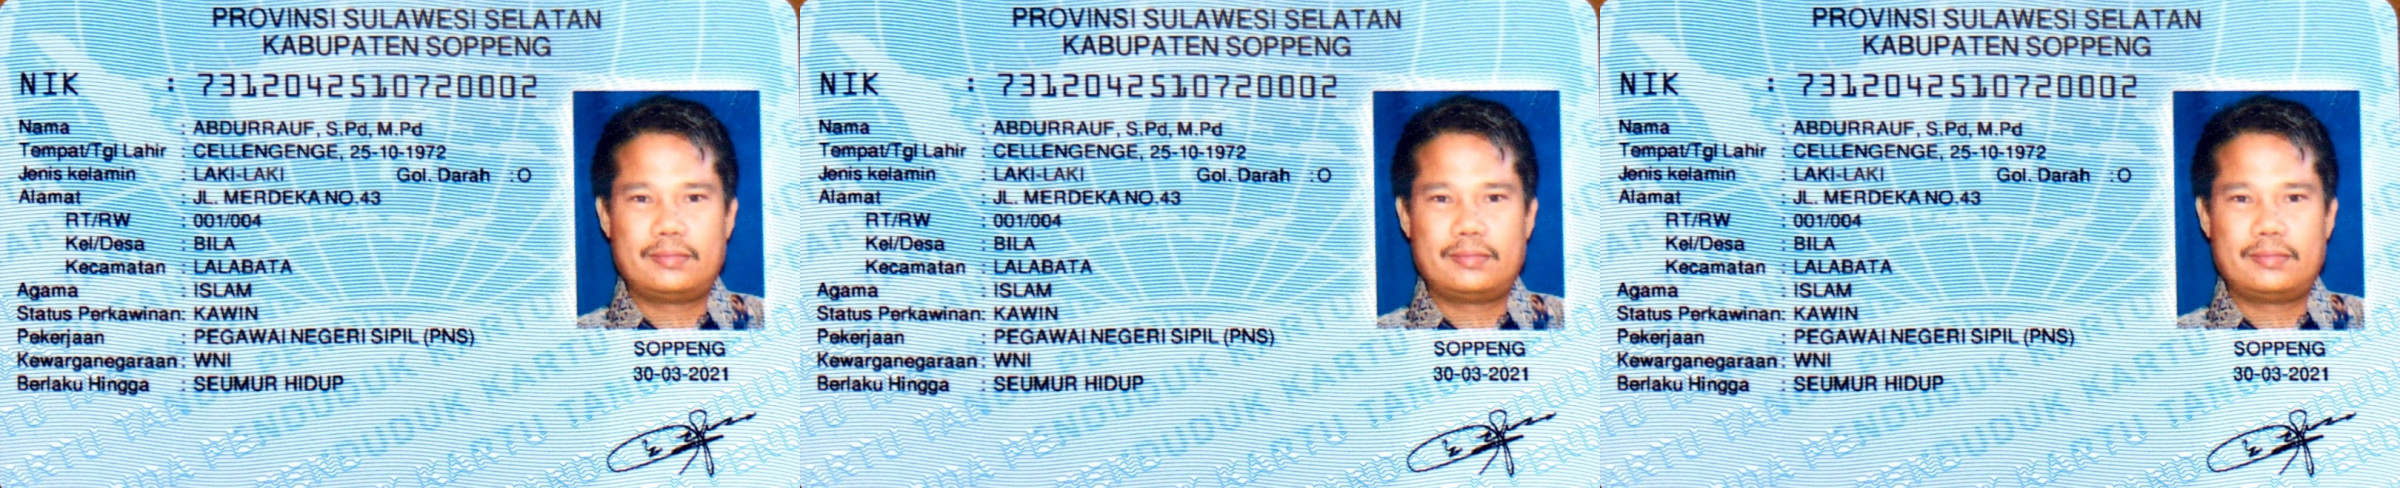

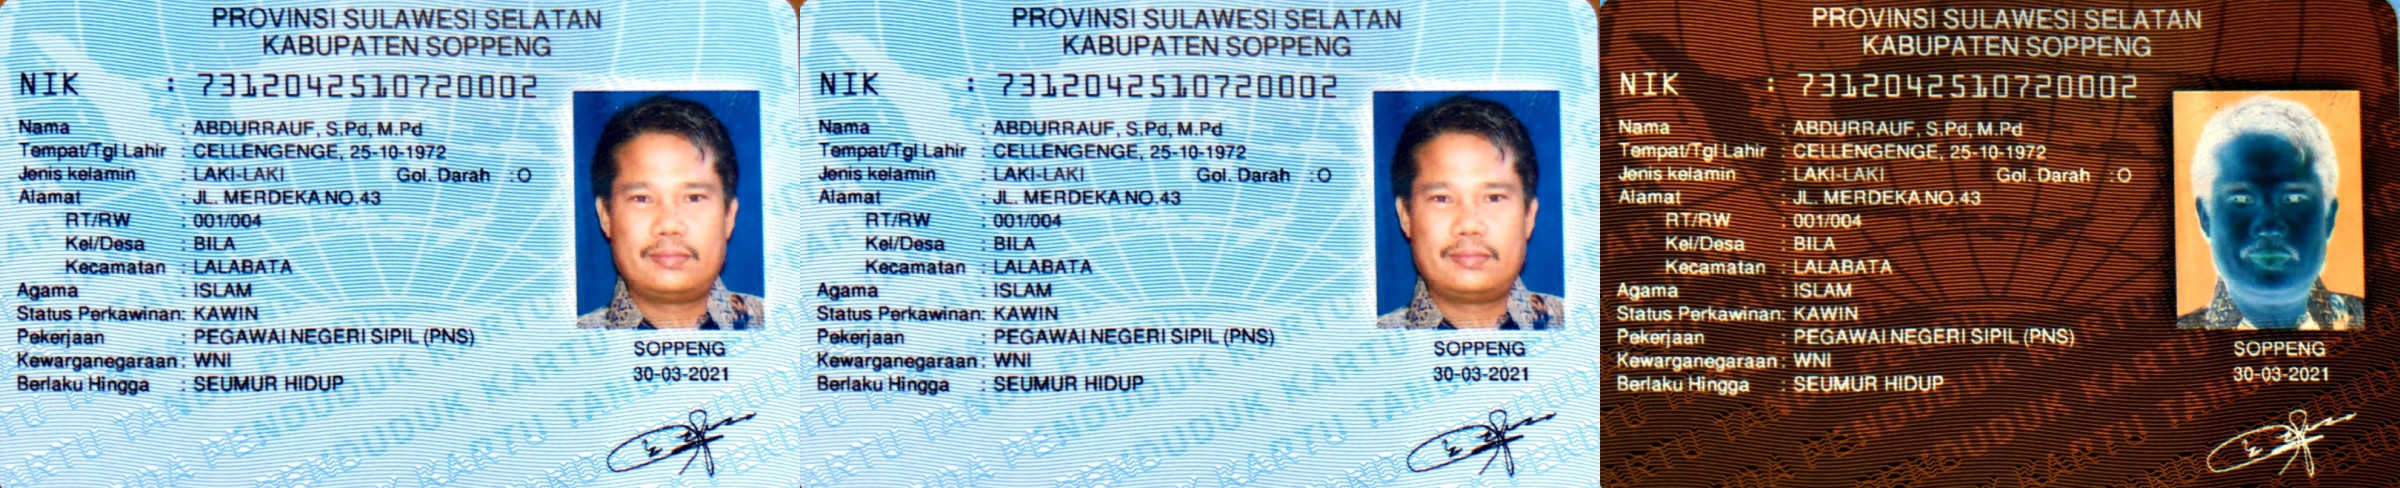

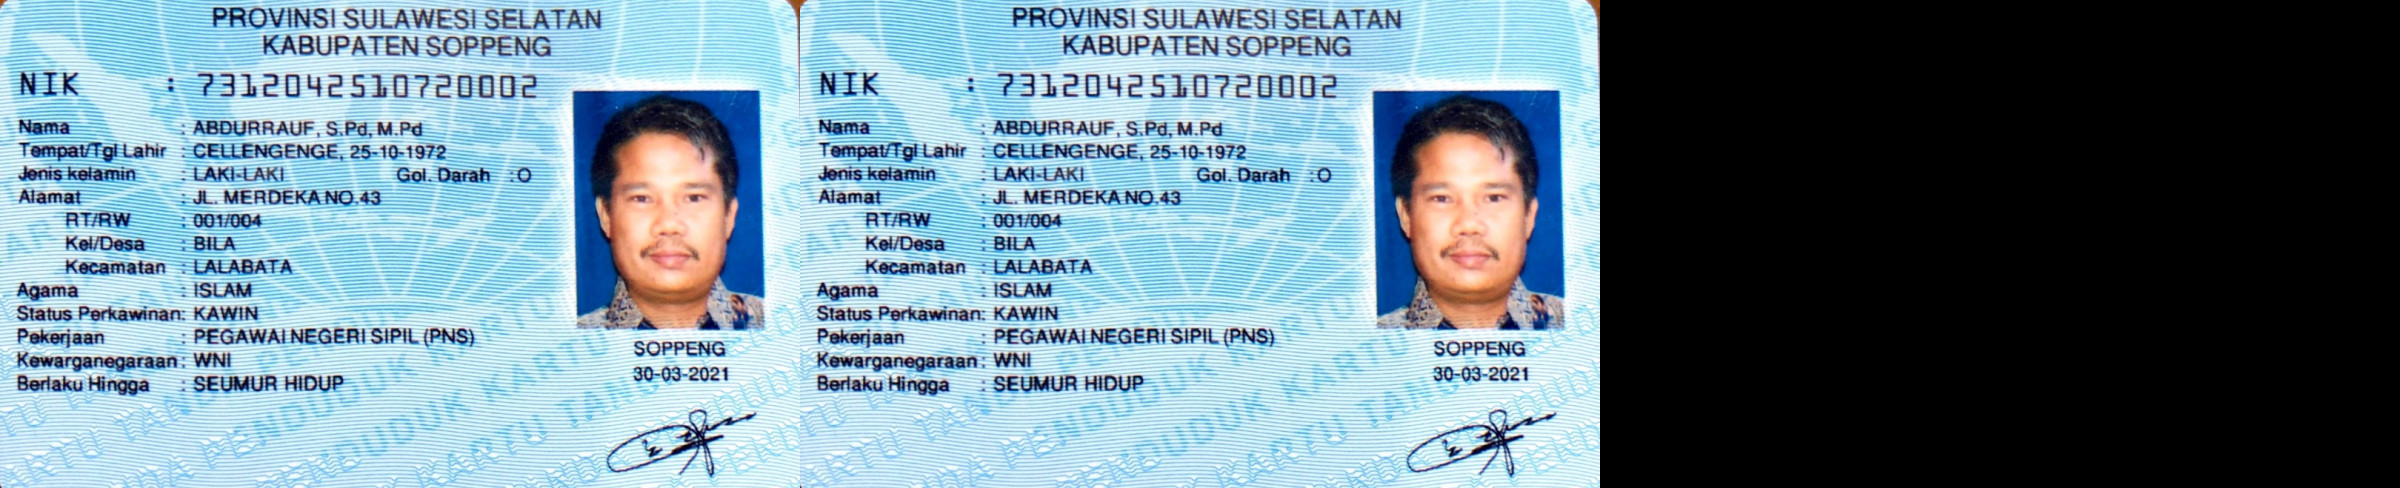

In [33]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Load the images
KTP_path = '/content/drive/MyDrive/PCVK_GANJIL_2023/content/KTP.jpeg'
mask_path = '/content/drive/MyDrive/PCVK_GANJIL_2023/content/KTP.jpeg'
KTP = cv.imread(KTP_path)
mask = cv.imread(mask_path)

# Resize the mask to match the size of KTP
mask_resized = cv.resize(mask, (KTP.shape[1], KTP.shape[0]))

# Perform bitwise NOT
inot = cv.bitwise_not(KTP)

# Perform bitwise OR
ior = cv.bitwise_or(KTP, mask_resized)

# Perform bitwise AND
iand = cv.bitwise_and(KTP, mask_resized)

# Perform bitwise AND followed by bitwise NOT
inand = cv.bitwise_not(cv.bitwise_and(KTP, mask_resized))

# Perform bitwise XOR
ixor = cv.bitwise_xor(KTP, mask_resized)

# Display the results
cv2_imshow(cv.hconcat((KTP, inot)))
cv2_imshow(cv.hconcat((KTP, mask_resized, ior)))
cv2_imshow(cv.hconcat((KTP, mask_resized, iand)))
cv2_imshow(cv.hconcat((KTP, mask_resized, inand)))
cv2_imshow(cv.hconcat((KTP, mask_resized, ixor)))